# Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.



A exploração de dados refere-se à investigação preliminar de dados para entender melhor suas características específicas.

Existem duas principais motivações para a exploração de dados:
1. Para ajudar os usuários a selecionar a técnica apropriada de pré-processamento e análise de dados usada.
2. Utilizar as habilidades humanas para reconhecer padrões nos dados.

Leia as instruções passo a passo abaixo com cuidado.
Para executar o código, clique na célula e pressione as teclas SHIFT-ENTER simultaneamente.

## Estatíticas de Resumo

As estatísticas de resumo são quantidades, como a média e o desvio padrão, que capturam várias características de um conjunto potencialmente grande de valores com um único número ou um pequeno conjunto de números. Neste tutorial, usaremos os dados da amostra Iris, que contém informações sobre 150 flores Iris, 50 cada uma de uma das três espécies de íris: Setosa, Versicolour e Virginica. Cada flor é caracterizada por cinco atributos:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica) 


Neste tutorial, você aprenderá como:

- Carregar um arquivo de dados CSV em um objeto Pandas DataFrame.

- Calcule várias estatísticas de resumo do DataFrame.

Para executar o programa de exemplo mostrado aqui, certifique-se de ter instalado a biblioteca Pandas.

- conda install pandas
- pip install pandas


**1.** Primeiro, você precisa baixar o <a href="http://archive.ics.uci.edu/ml/datasets/Iris"> conjunto de dados Iris </a> do repositório de aprendizado de máquina da UCI.

**<font color='red'>Code:</font>** O código a seguir usa Pandas para ler o arquivo CSV e armazená-los em um objeto DataFrame chamado data. Em seguida, ele exibirá as cinco primeiras linhas do quadro de dados.

In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2.** Para cada atributo qunatitativo, calcule seus valores médio, desvio padrão, mínimo e máximo.

**<font color="red">Code:</font>**

In [2]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** Para o atributo qualitativo (classe), conte a frequência para cada um dos seus valores distintos.

**<font color="red">Code:</font>**

In [3]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

**4.** Também é possível exibir o resumo de todos os atributos simultaneamente em uma tabela usando a função describe(). 
* Se um atributo é quantitativo, ele exibirá sua média, desvio padrão e vários quantis (incluindo mínimo, mediano e máximo). 
* Se um atributo for qualitativo, ele exibirá seu número de valores exclusivos e os valores principais (mais frequentes).

**<font color="red">Code:</font>**

In [7]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** Para estatísticas multivariadas, você pode calcular a covariância e a correlação entre pares de atributos.
**<font color="red">Code:</font>**

$cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$

O sinal na covariância indica o tipo de relação que as duas variáveis tem. Um sinal positivo indica que elas movem juntas e um negativo que elas movem em direções opostas. Enquanto a covariância cresce com o poder do relacionamento, ainda é relativamente difícil fazer julgamentos sobre o poder do relacionamento entre as duas variáveis observando a covariância, pois ela não é padronizada.

In [8]:
print('Covariance:')
data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


$corr_{x,y}=\frac{cov_{x,y}}{\sigma_{x}\sigma{y}}$

A correlação nunca pode ser maior do que 1 ou menor do que menos 1. Uma correlação próxima a zero indica que as duas variáveis não estão relacionadas. Uma correlação positiva indica que as duas variáveis movem juntas, e a relação é forte quanto mais a correlação se aproxima de um. Uma correlação negativa indica que as duas variáveis movem-se em direções opostas, e que a relação também fica mais forte quanto mais próxima de menos 1 a correlção ficar. Duas variáveis que estão perfeitamente correlacionadas positivamente (r=1) movem-se essencialmente em perfeita proporção na mesma direção, enquanto dois conjuntos que estão perfeitamente correlacionados negativamente movem-se em perfeita proporção em direções opostas.

In [9]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## Visualização de Dados

Visualização de dados é a exibição de informações em um formato gráfico ou tabular. A visualização bem-sucedida requer que os dados (informações) sejam convertidos em um formato visual para que as características dos dados e os relacionamentos
entre itens de dados ou atributos podem ser analisados ou relatados.

Neste tutorial, você aprenderá como exibir os dados da Iris criados na Seção 3.1. Para executar o programa de exemplo mostrado aqui, certifique-se de ter instalado o pacote da biblioteca matplotlib.

* conda isntall matplotlib
* pip install matplotlib

**1.**  Primeiro, exibiremos o histograma para o atributo sepal length (comprimento da sépala), discretizando-o em 8 bins  e contando a frequência para cada bin.

**<font color="red">Code:</font>**

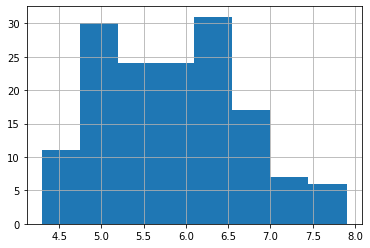

In [10]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** Um boxplot também pode ser usado para mostrar a distribuição de valores para cada atributo.

**<font color="red">Code:</font>**

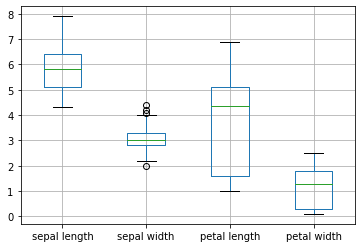

In [11]:
data.boxplot()

**3.** Para cada par de atributos, podemos usar um gráfico de dispersão para visualizar sua distribuição conjunta.
**<font color="red">Code:</font>**

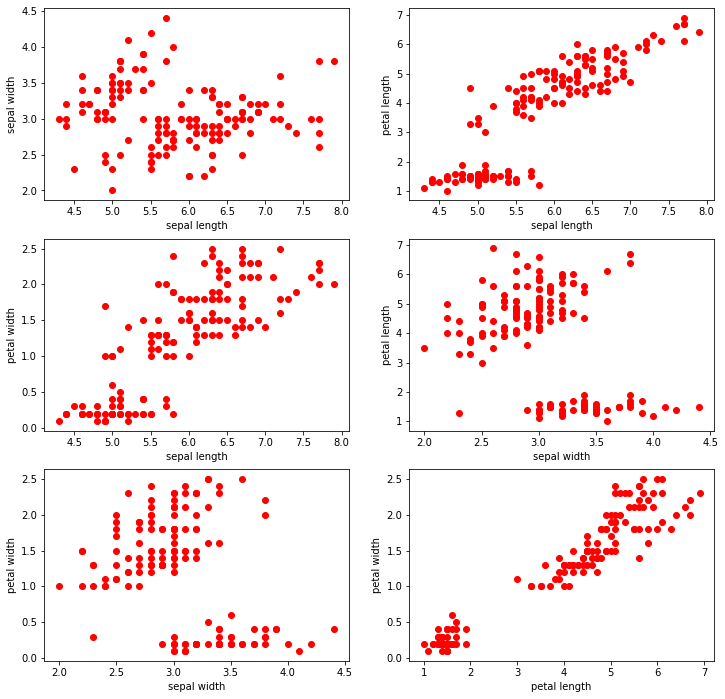

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** Coordenadas paralelas podem ser usadas para exibir todos os pontos de dados simultaneamente. As coordenadas paralelas têm um eixo de coordenadas para cada atributo, mas os diferentes eixos são paralelos um ao outro em vez de perpendiculares, como é tradicional. Além disso, um objeto é representado como uma linha em vez de um ponto. No exemplo abaixo, a distribuição de valores para cada classe pode ser identificada em uma cor separada.

**<font color="red">Code:</font>**

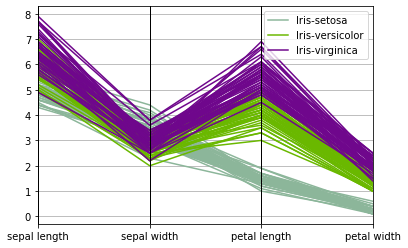

In [13]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')



**<font color='blue'>References:</font>**

1. Documentation on Pandas. https://pandas.pydata.org/
2. Documentation on matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 